# ``````````````````````````````````` Project 3 (Data Visualization)  ````````````````````````````

## Data 1 : Walmart Stock

In [57]:
#importing packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [58]:
#reading data in pandas dataframe
data = pd.read_csv('walmart_stock.csv',index_col="Date",parse_dates=True)

In [59]:
#displaying data
data.head(15)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215
2012-01-10,59.430000,59.709999,58.980000,59.040001,6907300,51.494109
2012-01-11,59.060001,59.529999,59.040001,59.400002,6365600,51.808098
2012-01-12,59.790001,60.000000,59.400002,59.500000,7236400,51.895316
2012-01-13,59.180000,59.610001,59.009998,59.540001,7729300,51.930204


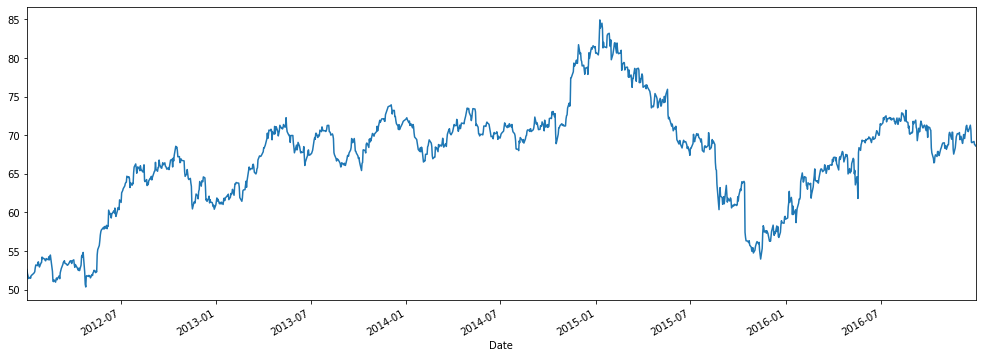

In [28]:
#line chart (menampilkan jumah stok di waltmart selama beberapa tahun terakhir)
data["Adj Close"].plot(figsize=(17,6))

## Data 2 : Contact Lens

In [29]:
#reading data in pandas dataframe
lensa_data = pd.read_csv('ContactLens.csv')

In [30]:
#displaying data
lensa_data.head(10)

,age,spectacle-prescription,astigmatic,tear-production-rate,classes
0,young,myope,no,reduce,none
1,young,myope,no,normal,soft
2,young,myope,yes,reduce,none
3,young,myope,yes,normal,hard
4,young,hypermetrope,no,reduce,none
5,young,hypermetrope,no,normal,soft
6,young,hypermetrope,yes,reduce,none
7,young,hypermetrope,yes,normal,hard
8,pre-presbyopic,myope,no,reduce,none
9,pre-presbyopic,myope,no,normal,soft


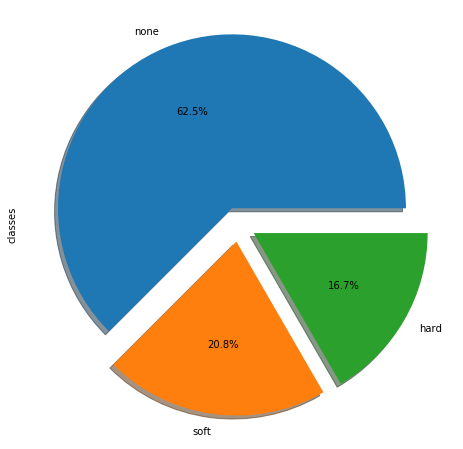

In [31]:
# Pie chart (menunjukkan presentasi dari setiap classes)
lensa_data['classes'].value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.1f%%',shadow=True,figsize=(10,8))
plt.show()

## Data 3 : Pokemon

In [32]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
from matplotlib import pyplot as plt

In [33]:
pokemon = pd.read_csv('Pokemon.csv')

In [34]:
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [35]:
most_powerful = pokemon[pokemon['Legendary']!= True].sort_values('Total' ,ascending = False)

In [36]:
pokemon_final = df_without_mega = most_powerful[~most_powerful.Name.str.contains("Mega")]

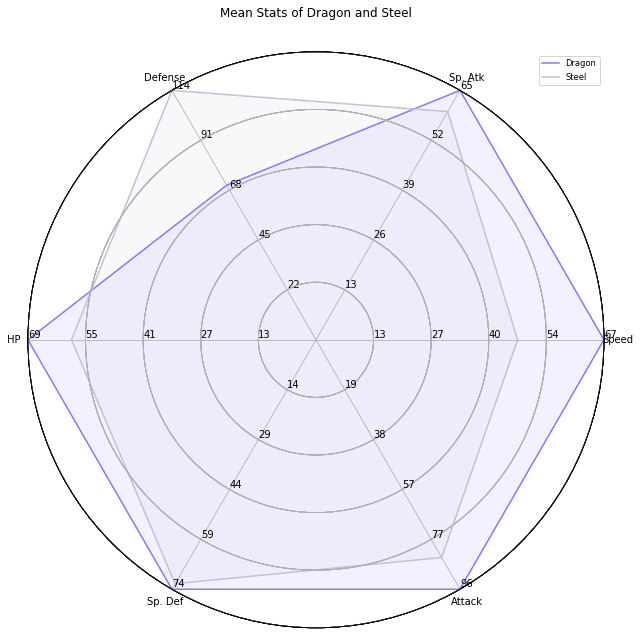

In [95]:
stats_df = pokemon_final.groupby('Type 1').mean()

stats = stats_df[['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']] #Get stats without 'Total' column
list_types = stats.index.unique().tolist()#Get types into a list

TYPE_LIST = ['Grass','Fire','Water','Bug','Normal','Poison',
            'Electric','Ground','Fairy','Fighting','Psychic',
            'Rock','Ghost','Ice','Dragon','Dark','Steel','Flying']

COLOR_LIST = ['#8ED752', '#F95643', '#53AFFE', '#C3D221', '#BBBDAF', '#AD5CA2', 
              '#F8E64E', '#F0CA42', '#F9AEFE', '#A35449', '#FB61B4', '#CDBD72', 
              '#7673DA', '#66EBFF', '#8B76FF', '#8E6856', '#C3C1D7', '#75A4F9']

COLOR_MAP = dict(zip(TYPE_LIST, COLOR_LIST))


# A radar chart example: http://datascience.stackexchange.com/questions/6084/how-do-i-create-a-complex-radar-chart
def _scale_data(data, ranges):
    (x1, x2), d = ranges[0], data[0]
    return [(d - y1) / (y2 - y1) * (x2 - x1) + x1 for d, (y1, y2) in zip(data, ranges)]

class RaderChart():
    def __init__(self, fig, variables, ranges, n_ordinate_levels = 6):
        angles = np.arange(0, 360, 360./len(variables))

        axes = [fig.add_axes([0.1,0.1,0.8,0.8],polar = True, label = "axes{}".format(i)) for i in range(len(variables))]
        _, text = axes[0].set_thetagrids(angles, labels = variables)
        
        for txt, angle in zip(text, angles):
            txt.set_rotation(angle - 90)
        for ax in axes[1:]:
            ax.patch.set_visible(False)
            ax.xaxis.set_visible(False)
            ax.grid("off")
        
        for i, ax in enumerate(axes):
            grid = np.linspace(*ranges[i], num = n_ordinate_levels)
            grid_label = [""]+[str(int(x)) for x in grid[1:]]
            ax.set_rgrids(grid, labels = grid_label, angle = angles[i])
            ax.set_ylim(*ranges[i])
        
        self.angle = np.deg2rad(np.r_[angles, angles[0]])
        self.ranges = ranges
        self.ax = axes[0]

    def plot(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.plot(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

    def fill(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.fill(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

    def legend(self, *args, **kw):
        self.ax.legend(*args, **kw)
        
# select display colors according to Pokemon's Type 1
def select_color(types):
    colors = [None] * len(types)
    used_colors = set()
    for i, t in enumerate(types):
        curr = COLOR_MAP[t]
        if curr not in used_colors:
            colors[i] = curr
            used_colors.add(curr)
    unused_colors = set(COLOR_LIST) - used_colors
    for i, c in enumerate(colors):
        if not c:
            try:
                colors[i] = unused_colors.pop()
            except:
                raise Exception('Attempt to visualize too many pokemons. No more colors available.')
    return colors



df = stats
df = df.reset_index()
# In this order, 
# HP, Defense and Sp. Def will show on left; They represent defense abilities
# Speed, Attack and Sp. Atk will show on right; They represent attack abilities
# Attack and Defense, Sp. Atk and Sp. Def will show on opposite positions
use_attributes = ['Speed', 'Sp. Atk', 'Defense', 'HP', 'Sp. Def', 'Attack']
# choose the pokemons you like
use_pokemons = ['Steel','Dragon']

df_plot = df[df['Type 1'].map(lambda x:x in use_pokemons)==True] #df[df['Name']
use_pokemons = df_plot['Type 1'].values
datas = df_plot[use_attributes].values 
ranges = [[2**-20, df_plot[attr].max()] for attr in use_attributes]
colors = select_color(df_plot['Type 1']) # select colors based on pokemon Type 1 #'Type 1'

fig = plt.figure(figsize=(10, 10))
radar = RaderChart(fig, use_attributes, ranges)
for data, color, pokemon in zip(datas, colors, use_pokemons):
    radar.plot(data, color = color, label = pokemon)
    radar.fill(data, alpha = 0.1, color = color)
    radar.legend(loc = 1, fontsize = 'small')
plt.title('Mean Stats of '+(', '.join(use_pokemons[:-1])+' and '+use_pokemons[-1] if len(use_pokemons)>1 else use_pokemons[0]))
plt.show() 

## Data 4 : Iris

In [46]:
#reading iris data in pandas dataframe
iris_data = pd.read_csv('Iris.csv')

In [48]:
#displaying data
iris_data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024717975A90>,
      dtype=object)

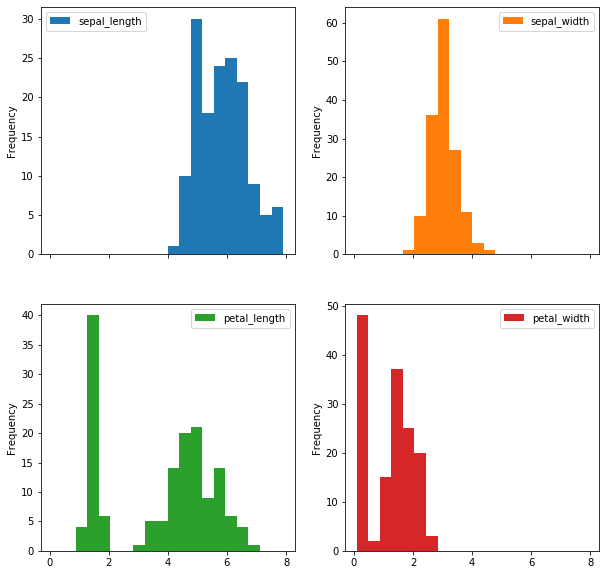

In [49]:
#Histogram: untuk menampilkan seberapa sering kategori "petal-width" muncul
iris_data.plot.hist(subplots=True, layout=(2,2), figsize=(10, 10), bins=20)

## Data 5: Countries

In [78]:
#reading iris data in pandas dataframe
countries_data = pd.read_csv('countries.csv')

In [79]:
#displaying data
countries_data.head(10)

,country,year,population
0,Afghanistan,1952,8425333
1,Afghanistan,1957,9240934
2,Afghanistan,1962,10267083
3,Afghanistan,1967,11537966
4,Afghanistan,1972,13079460
5,Afghanistan,1977,14880372
6,Afghanistan,1982,12881816
7,Afghanistan,1987,13867957
8,Afghanistan,1992,16317921
9,Afghanistan,1997,22227415


In [80]:
len(countries_data.country.unique())

142

In [81]:
ina = countries_data[countries_data.country == 'Indonesia']

In [82]:
china = countries_data[countries_data.country == 'China']

In [83]:
china

,country,year,population
288,China,1952,556263527
289,China,1957,637408000
290,China,1962,665770000
291,China,1967,754550000
292,China,1972,862030000
293,China,1977,943455000
294,China,1982,1000281000
295,China,1987,1084035000
296,China,1992,1164970000
297,China,1997,1230075000


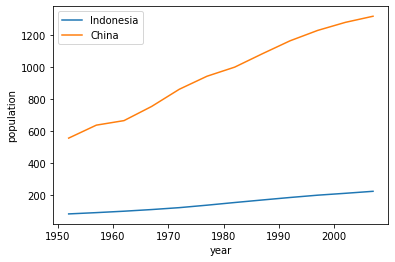

In [84]:
# Time-series [menampilakan jumlah populasi penduduk Indonesia dan China pada tahun 1950-2007]
plt.plot(ina.year, ina.population / 10**6)
plt.plot(china.year, china.population / 10**6)
plt.legend(['Indonesia', 'China'])
plt.xlabel('year')
plt.ylabel('population')
plt.show()

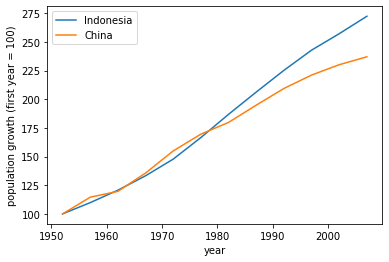

In [85]:
plt.plot(ina.year, ina.population / ina.population.iloc[0] * 100)
plt.plot(china.year, china.population / china.population.iloc[0] * 100)
plt.legend(['Indonesia', 'China'])
plt.xlabel('year')
plt.ylabel('population growth (first year = 100)')
plt.show()

In [86]:
ina.population / ina.population.iloc[0] * 100

708    100.000000
709    109.837664
710    120.689319
711    133.260615
712    147.811144
713    166.632136
714    186.885146
715    206.303320
716    225.242529
717    242.867937
718    257.227124
719    272.445522
Name: population, dtype: float64

In [87]:
china.population / china.population.iloc[0] * 100

288    100.000000
289    114.587416
290    119.686078
291    135.646140
292    154.967917
293    169.605763
294    179.821425
295    194.877958
296    209.427716
297    221.131701
298    230.178672
299    237.060859
Name: population, dtype: float64

In [88]:
ina.year

708    1952
709    1957
710    1962
711    1967
712    1972
713    1977
714    1982
715    1987
716    1992
717    1997
718    2002
719    2007
Name: year, dtype: int64

### .............................................................................. Thanks .........................................................................................